In [1]:
# Load MNIST dataset from interwebz
#
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


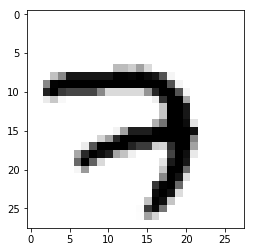

In [22]:
# check out the datas
#
import matplotlib.pyplot as plt
import numpy as np

i = 0
D = mnist.train.images.shape[1]
d = int(np.sqrt(D))

plt.imshow(img, cmap='Greys')
plt.show()

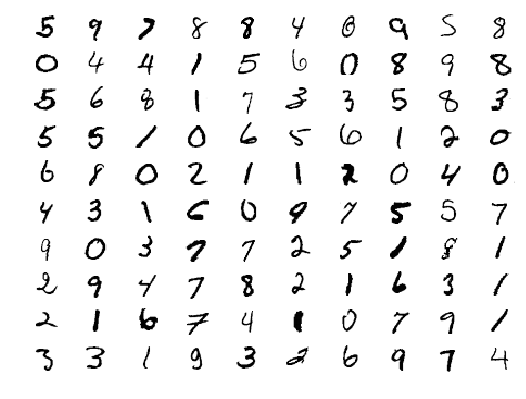

In [26]:
# show 100 random images
#
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8, 6), dpi=80)

idx = np.random.choice(mnist.train.images.shape[0], size=100, replace=False)

i = 0
for row in ax:
    for col in row:
        img = mnist.train.images[idx[i],:].reshape((d, d))
        i += 1
        col.imshow(img, cmap='Greys')
        col.axis('off')

plt.show()